In [4]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil




In [5]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd



In [6]:
# Import dataset
url1 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/circuits.csv"
circuits = pd.read_csv(url1)

url2 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/lap_times.csv"
laptimes = pd.read_csv(url2)

url3 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/pit_stops.csv"
pitstops = pd.read_csv(url3)

url4 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/seasons.csv"
seasons = pd.read_csv(url4)

url5 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/status.csv"
status = pd.read_csv(url5)

url6 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/constructor_standings.csv"
constructor_standings = pd.read_csv(url6)

url7 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/constructors.csv"
constructors = pd.read_csv(url7)

url8 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/driver_standings.csv"
driver_standings = pd.read_csv(url8)

url9 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/drivers.csv"
drivers = pd.read_csv(url9)

url10 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/races.csv"
races = pd.read_csv(url10)

url11 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/constructor_results.csv"
constructor_results = pd.read_csv(url11)

url12 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/results.csv"
results= pd.read_csv(url12)

url13 = "https://raw.githubusercontent.com/ansh21080/ML-605/main/qualifying.csv"
qualifying = pd.read_csv(url13)



print('Data source import complete.')



pd.get_option("display.max_columns",None)

Data source import complete.


20

In [7]:
drivers.head()
#dob=doğum tarihleri

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [8]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [9]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [10]:
circuits.isnull().sum()
circuits['circuitId'].dtype
circuits.dtypes


circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt            object
url            object
dtype: object

In [11]:
laptimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [12]:
pitstops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [13]:
seasons.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [14]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [15]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [16]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [17]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [18]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [19]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [20]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [21]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [22]:
#Burada kullanıcağım csv dosyalarından bazılarını seçtim,şampiyon tahmini yapacağımdan dolayı results,stats,drivers,races,constructor,driver_standings dosyalarını kullanıma uygun gördüm.
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [23]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [24]:
#Burada incelerken url kısmının gereksiz olduğunu görebiliyoruz o yüzden ilerleyen zamanda bu kısmı dropluycaz.
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [25]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [26]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


In [27]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


In [28]:
#Merge ederken kullanıcaklarımı ve onları df içerisindeki tabloda neye göre sıralıycağımı belirleyerek ona göre merge işlemini gerçekleştirdim.

df = pd.merge(results,races[['raceId','year','name','round','date']],on = 'raceId',how = 'left')
df=pd.merge(df,drivers[['driverId','driverRef','forename','surname','nationality','dob']],on='driverId',how='left')
df=pd.merge(df,constructors[['constructorId','name','nationality']],on='constructorId',how='left')
df=pd.merge(df,status[['statusId','status']],on='statusId',how='left')
#Bu satırı yazma sebebim bütün sütunları görebilmek
pd.get_option("display.max_columns",None)
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,round,date,driverRef,forename,surname,nationality_x,dob,name_y,nationality_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07,McLaren,British,Finished
1,2,18,2,2,3,5,2,2,2,8.0,...,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10,BMW Sauber,German,Finished
2,3,18,3,3,7,7,3,3,3,6.0,...,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27,Williams,British,Finished
3,4,18,4,4,5,11,4,4,4,5.0,...,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29,Renault,French,Finished
4,5,18,5,1,23,3,5,5,5,4.0,...,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19,McLaren,British,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31,Williams,British,Finished
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19,Haas F1 Team,American,Finished
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage


In [29]:
#Gereksiz sütunları kaldırdık
df.drop(['number','position','positionText','statusId','resultId','driverId','constructorId'],axis =1,inplace = True)


In [30]:
df

,raceId,grid,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,...,round,date,driverRef,forename,surname,nationality_x,dob,name_y,nationality_y,status
0,18,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,...,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07,McLaren,British,Finished
1,18,5,2,8.0,58,+5.478,5696094,41,3,1:27.739,...,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10,BMW Sauber,German,Finished
2,18,7,3,6.0,58,+8.163,5698779,41,5,1:28.090,...,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27,Williams,British,Finished
3,18,11,4,5.0,58,+17.181,5707797,58,7,1:28.603,...,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29,Renault,French,Finished
4,18,3,5,4.0,58,+18.014,5708630,43,1,1:27.418,...,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19,McLaren,British,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,19,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,...,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished
26076,1110,18,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,...,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31,Williams,British,Finished
26077,1110,0,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,...,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19,Haas F1 Team,American,Finished
26078,1110,4,19,0.0,23,\N,\N,9,19,1:53.138,...,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage


In [31]:
df.rename(columns = {'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality',
                    'name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace = True)
df

,raceId,grid,positionOrder,points,laps,time,milliseconds,fastestLap,fastest_lap_rank,fastestLapTime,...,round,date,driver,forename,surname,driver_nationality,dob,constructor_name,constructor_nationality,status
0,18,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,...,1,2008-03-16,hamilton,Lewis,Hamilton,British,1985-01-07,McLaren,British,Finished
1,18,5,2,8.0,58,+5.478,5696094,41,3,1:27.739,...,1,2008-03-16,heidfeld,Nick,Heidfeld,German,1977-05-10,BMW Sauber,German,Finished
2,18,7,3,6.0,58,+8.163,5698779,41,5,1:28.090,...,1,2008-03-16,rosberg,Nico,Rosberg,German,1985-06-27,Williams,British,Finished
3,18,11,4,5.0,58,+17.181,5707797,58,7,1:28.603,...,1,2008-03-16,alonso,Fernando,Alonso,Spanish,1981-07-29,Renault,French,Finished
4,18,3,5,4.0,58,+18.014,5708630,43,1,1:27.418,...,1,2008-03-16,kovalainen,Heikki,Kovalainen,Finnish,1981-10-19,McLaren,British,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,19,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,...,12,2023-07-30,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished
26076,1110,18,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,...,12,2023-07-30,sargeant,Logan,Sargeant,American,2000-12-31,Williams,British,Finished
26077,1110,0,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,...,12,2023-07-30,hulkenberg,Nico,Hülkenberg,German,1987-08-19,Haas F1 Team,American,Finished
26078,1110,4,19,0.0,23,\N,\N,9,19,1:53.138,...,12,2023-07-30,sainz,Carlos,Sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage


In [32]:
df['driver_name']=df['forename']+ ' '+ df['surname']
df.drop(['forename','surname'],axis=1,inplace=True)

In [33]:
df

,raceId,grid,positionOrder,points,laps,time,milliseconds,fastestLap,fastest_lap_rank,fastestLapTime,...,gp_name,round,date,driver,driver_nationality,dob,constructor_name,constructor_nationality,status,driver_name
0,18,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,...,Australian Grand Prix,1,2008-03-16,hamilton,British,1985-01-07,McLaren,British,Finished,Lewis Hamilton
1,18,5,2,8.0,58,+5.478,5696094,41,3,1:27.739,...,Australian Grand Prix,1,2008-03-16,heidfeld,German,1977-05-10,BMW Sauber,German,Finished,Nick Heidfeld
2,18,7,3,6.0,58,+8.163,5698779,41,5,1:28.090,...,Australian Grand Prix,1,2008-03-16,rosberg,German,1985-06-27,Williams,British,Finished,Nico Rosberg
3,18,11,4,5.0,58,+17.181,5707797,58,7,1:28.603,...,Australian Grand Prix,1,2008-03-16,alonso,Spanish,1981-07-29,Renault,French,Finished,Fernando Alonso
4,18,3,5,4.0,58,+18.014,5708630,43,1,1:27.418,...,Australian Grand Prix,1,2008-03-16,kovalainen,Finnish,1981-10-19,McLaren,British,Finished,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,19,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,...,Belgian Grand Prix,12,2023-07-30,ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished,Daniel Ricciardo
26076,1110,18,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,...,Belgian Grand Prix,12,2023-07-30,sargeant,American,2000-12-31,Williams,British,Finished,Logan Sargeant
26077,1110,0,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,...,Belgian Grand Prix,12,2023-07-30,hulkenberg,German,1987-08-19,Haas F1 Team,American,Finished,Nico Hülkenberg
26078,1110,4,19,0.0,23,\N,\N,9,19,1:53.138,...,Belgian Grand Prix,12,2023-07-30,sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage,Carlos Sainz


In [34]:
df.head()

,raceId,grid,positionOrder,points,laps,time,milliseconds,fastestLap,fastest_lap_rank,fastestLapTime,...,gp_name,round,date,driver,driver_nationality,dob,constructor_name,constructor_nationality,status,driver_name
0,18,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,...,Australian Grand Prix,1,2008-03-16,hamilton,British,1985-01-07,McLaren,British,Finished,Lewis Hamilton
1,18,5,2,8.0,58,+5.478,5696094,41,3,1:27.739,...,Australian Grand Prix,1,2008-03-16,heidfeld,German,1977-05-10,BMW Sauber,German,Finished,Nick Heidfeld
2,18,7,3,6.0,58,+8.163,5698779,41,5,1:28.090,...,Australian Grand Prix,1,2008-03-16,rosberg,German,1985-06-27,Williams,British,Finished,Nico Rosberg
3,18,11,4,5.0,58,+17.181,5707797,58,7,1:28.603,...,Australian Grand Prix,1,2008-03-16,alonso,Spanish,1981-07-29,Renault,French,Finished,Fernando Alonso
4,18,3,5,4.0,58,+18.014,5708630,43,1,1:27.418,...,Australian Grand Prix,1,2008-03-16,kovalainen,Finnish,1981-10-19,McLaren,British,Finished,Heikki Kovalainen


In [35]:
#String yapısını date formatına dönüştürdüm
pd.to_datetime(df.dob)


0       1985-01-07
1       1977-05-10
2       1985-06-27
3       1981-07-29
4       1981-10-19
           ...    
26075   1989-07-01
26076   2000-12-31
26077   1987-08-19
26078   1994-09-01
26079   2001-04-06
Name: dob, Length: 26080, dtype: datetime64[ns]

In [36]:
df['dob'] = pd.to_datetime(df['dob'])


In [37]:
from datetime import datetime


In [38]:

dates = datetime.today()-df['dob']
age = dates.dt.days/365

In [39]:
#İlerisinde yaşa göre grafik çizdirebilmek için sürücülerin şu an ki tarihe göre yaş dağılımlarını almak için bazı hesaplamalar yaptım ve 'age' adı altında yeni bir sütun oluşturdum
df['age'] = round(age)


In [40]:
df

,raceId,grid,positionOrder,points,laps,time,milliseconds,fastestLap,fastest_lap_rank,fastestLapTime,...,round,date,driver,driver_nationality,dob,constructor_name,constructor_nationality,status,driver_name,age
0,18,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,...,1,2008-03-16,hamilton,British,1985-01-07,McLaren,British,Finished,Lewis Hamilton,39.0
1,18,5,2,8.0,58,+5.478,5696094,41,3,1:27.739,...,1,2008-03-16,heidfeld,German,1977-05-10,BMW Sauber,German,Finished,Nick Heidfeld,47.0
2,18,7,3,6.0,58,+8.163,5698779,41,5,1:28.090,...,1,2008-03-16,rosberg,German,1985-06-27,Williams,British,Finished,Nico Rosberg,39.0
3,18,11,4,5.0,58,+17.181,5707797,58,7,1:28.603,...,1,2008-03-16,alonso,Spanish,1981-07-29,Renault,French,Finished,Fernando Alonso,43.0
4,18,3,5,4.0,58,+18.014,5708630,43,1,1:27.418,...,1,2008-03-16,kovalainen,Finnish,1981-10-19,McLaren,British,Finished,Heikki Kovalainen,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,1110,19,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,...,12,2023-07-30,ricciardo,Australian,1989-07-01,AlphaTauri,Italian,Finished,Daniel Ricciardo,35.0
26076,1110,18,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,...,12,2023-07-30,sargeant,American,2000-12-31,Williams,British,Finished,Logan Sargeant,23.0
26077,1110,0,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,...,12,2023-07-30,hulkenberg,German,1987-08-19,Haas F1 Team,American,Finished,Nico Hülkenberg,37.0
26078,1110,4,19,0.0,23,\N,\N,9,19,1:53.138,...,12,2023-07-30,sainz,Spanish,1994-09-01,Ferrari,Italian,Collision damage,Carlos Sainz,30.0


**F1 TARİHİNDEKİ EN BAŞARILI 10 TAKIM**

In [41]:
top_constructors = pd.merge(constructor_standings, constructors, on='constructorId')
top_constructors = top_constructors.groupby('name')['points'].sum()
top_constructors = top_constructors.sort_values(ascending=False).head(10)

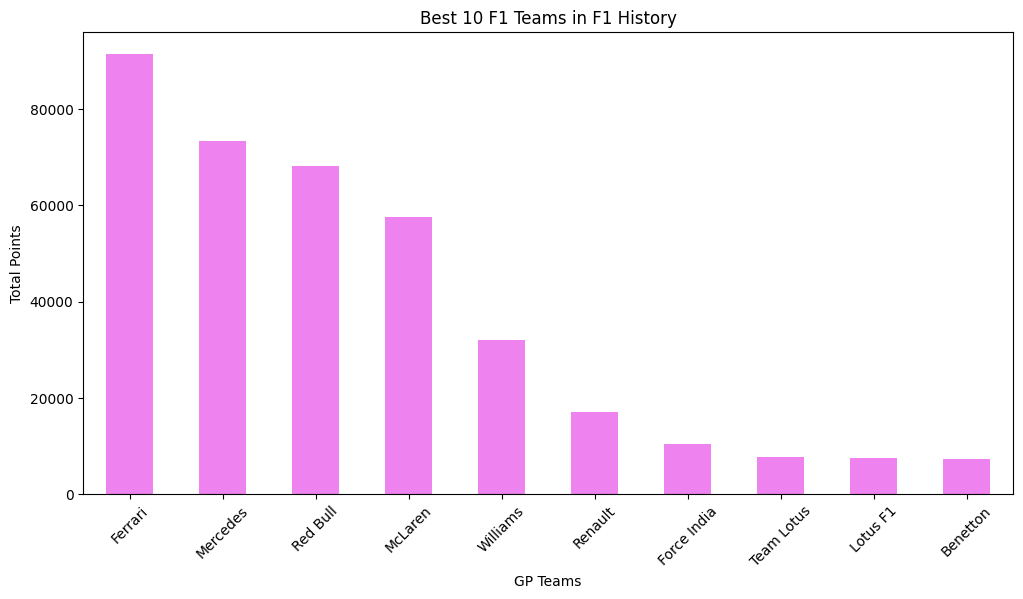

In [42]:
plt.figure(figsize=(12, 6))
top_constructors.plot(kind='bar', color='violet')
plt.xlabel('GP Teams')
plt.ylabel('Total Points')
plt.title('Best 10 F1 Teams in F1 History')
plt.xticks(rotation=45)
plt.show()


In [43]:
#Takımların yarış başına düşen puanları
the_best_teams=constructors.merge(results,on = 'constructorId',how = 'left')
the_best_teams = the_best_teams[['name','points','raceId']]
the_best_teams = the_best_teams.groupby('name')['raceId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
the_best_teams = the_best_teams[the_best_teams['races'] >= 100]
the_best_teams

,name,races
0,Ferrari,1066
1,McLaren,895
2,Williams,809
3,Tyrrell,433
4,Renault,403
5,Team Lotus,395
6,Sauber,395
7,Red Bull,360
8,Minardi,345
9,Ligier,330


<ipython-input-44-0122496a9384>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='races', y='name', data=the_best_teams, palette='viridis')  # Veri çerçevesini ve sütunları belirtiyoruz


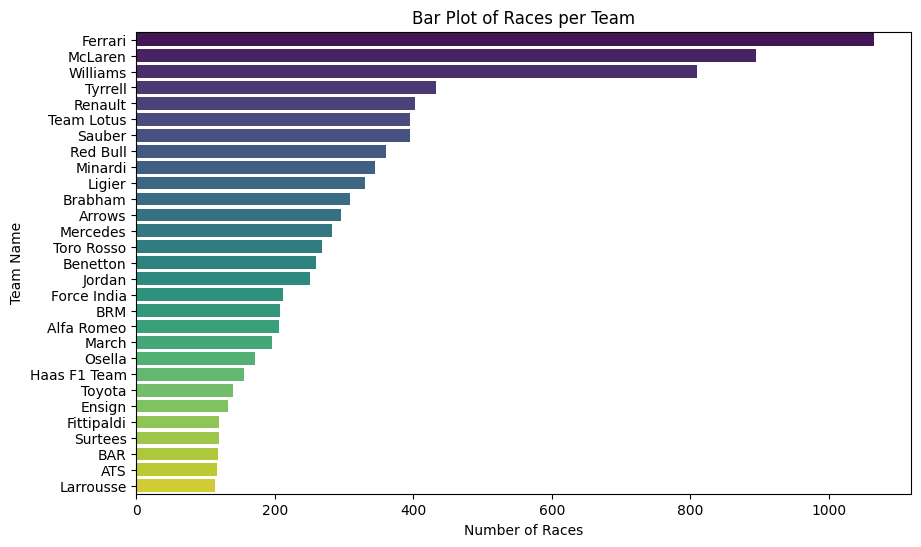

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='races', y='name', data=the_best_teams, palette='viridis')  # Veri çerçevesini ve sütunları belirtiyoruz
plt.xlabel('Number of Races')
plt.ylabel('Team Name')
plt.title('Bar Plot of Races per Team')
plt.show()

In [45]:
driver_nationality = df.groupby('driver_nationality')['driver_nationality'].count().sort_values(ascending = False).reset_index(name = 'number of drivers')
fig = go.Figure(data=[go.Pie(labels=driver_nationality.driver_nationality.head(10), values=driver_nationality['number of drivers'])])
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(
    title="Top 10 nationality since 1950")
fig.show()

In [46]:
# En genç 5 sürücüyü buldum ve hepsinin yaşını aldım
youngest_drivers = df.sort_values(by='dob', ascending=False).drop_duplicates(subset='driver_name')[:5]
youngest_drivers = youngest_drivers[['driver_name', 'driver_nationality', 'age']]
youngest_drivers = youngest_drivers.reset_index(drop=True)
print(youngest_drivers.to_string(index=False))



   driver_name driver_nationality  age
 Oscar Piastri         Australian 23.0
Logan Sargeant           American 23.0
  Yuki Tsunoda           Japanese 24.0
  Lando Norris            British 24.0
   Guanyu Zhou            Chinese 25.0


In [47]:
#Burada incelerken gereksiz \N satırlarını farkettim bunları NaN değerine çevirdim.
df.replace(r'\\N', None, regex=True, inplace=True)


In [48]:
df.columns

Index(['raceId', 'grid', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'fastest_lap_rank', 'fastestLapTime',
       'fastestLapSpeed', 'year', 'gp_name', 'round', 'date', 'driver',
       'driver_nationality', 'dob', 'constructor_name',
       'constructor_nationality', 'status', 'driver_name', 'age'],
      dtype='object')

In [49]:
## Burada en genç pilotları incelerken ve en yaşlılara bakarken bir sorun farkettim.Daha öncesinde 'age',sütunu oluşturduğumda ölen pilotların bilgisi elimde olmadığı için max yaşları çok fazla çıkıyordu
#Bunların en son yarış yaptıkları tarihlere bakarak yaşlarını güncelledim fakat emekli olanları ayrıştırmak istemediğim için en son yarışlarını 2015'te
#yapanların yaşlarını 2015 tarihine göre güncelledim

# Sütunları tarih nesnelerine dönüştürüyoruz
df["dob"] = pd.to_datetime(df["dob"])
df["date"] = pd.to_datetime(df["date"])

last_race_date = df["date"].max()

# Yaş sütunundaki değerleri hesaplayın
df["age"] = (last_race_date - df["dob"]).dt.days / 365.25

# 2015 yılı öncesinde yarışı olmayan kişilerin yaşlarını güncelleyin
df.loc[df["date"] < pd.to_datetime("2015-01-01"), "age"] = (last_race_date - df["dob"]).dt.days / 365.25
df['age']=round(age)


In [50]:
df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])

# Her sürücünün sadece bir kez gözüktüğü bir veri çerçevesi oluşturdum
unique_drivers = df.drop_duplicates(subset='driver_name')

# 2023 yılında en son yarışını yapmış olan sürücülerin yaş ortalamasını hesapladım
latest_race_2023 = unique_drivers[unique_drivers['date'].dt.year == 2023]
average_age_2023 = (latest_race_2023['date'] - latest_race_2023['dob']).dt.days / 365.25
print("2023 yılında yarışan sürücülerin yaş ortalaması:", average_age_2023.mean())

2023 yılında yarışan sürücülerin yaş ortalaması: 22.04243668720055


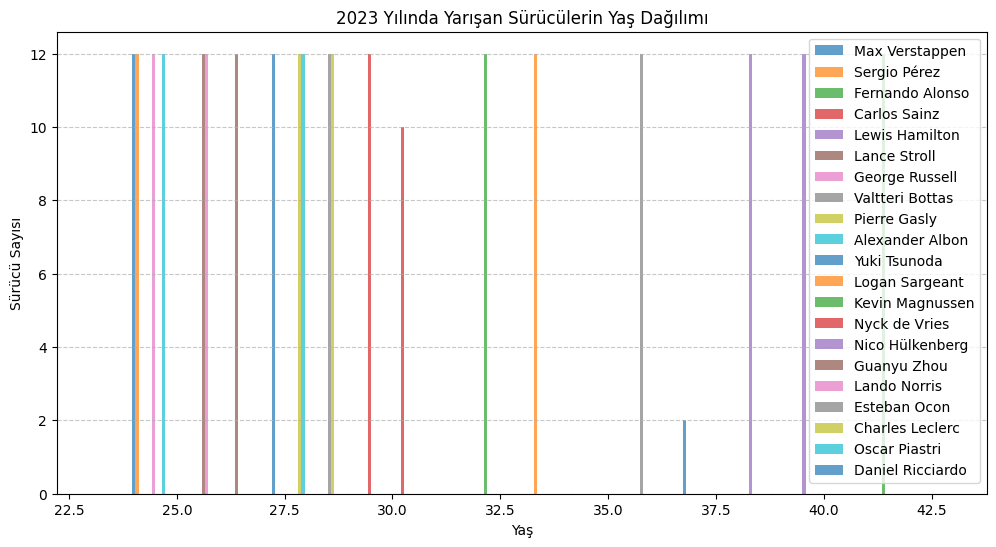

In [51]:


# 2023 yılında yarışan sürücülerin yaşlarını ve isimlerini aldım
simplified_df = df[df['date'].dt.year == 2023][['driver_name', 'age']]

# Sürücü isimlerini unique yaptım ki tekrarlayan verileri görmeyeyim
unique_drivers = simplified_df['driver_name'].unique()

# Her bir sürücünün yaşını bir listede topladım
ages_by_driver = [simplified_df[simplified_df['driver_name'] == driver]['age'].values for driver in unique_drivers]

# Çubuk grafik çizdirdim
plt.figure(figsize=(12, 6))
plt.hist(ages_by_driver, bins=10, alpha=0.7, label=unique_drivers)
plt.xlabel('Yaş')
plt.ylabel('Sürücü Sayısı')
plt.title('2023 Yılında Yarışan Sürücülerin Yaş Dağılımı')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Text(0.5, 0, 'Number of GP wins')

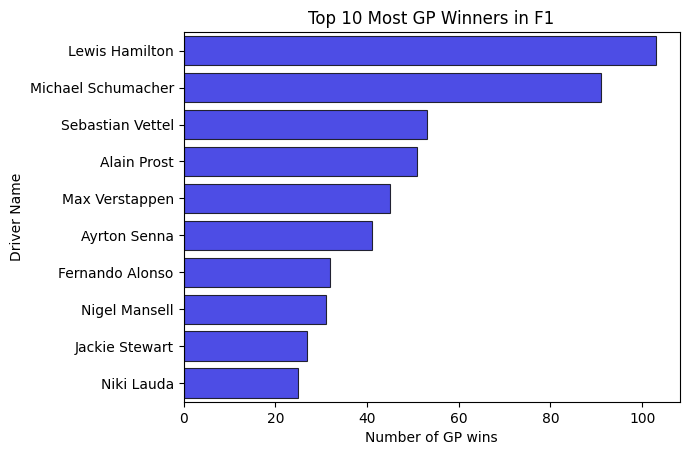

In [52]:
driver_winner = df.loc[df['positionOrder']==1].groupby('driver_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
top10Drivers =driver_winner.head(10)
sns.barplot(data=top10Drivers,y='driver_name',x='positionOrder',color='blue',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Top 10 Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

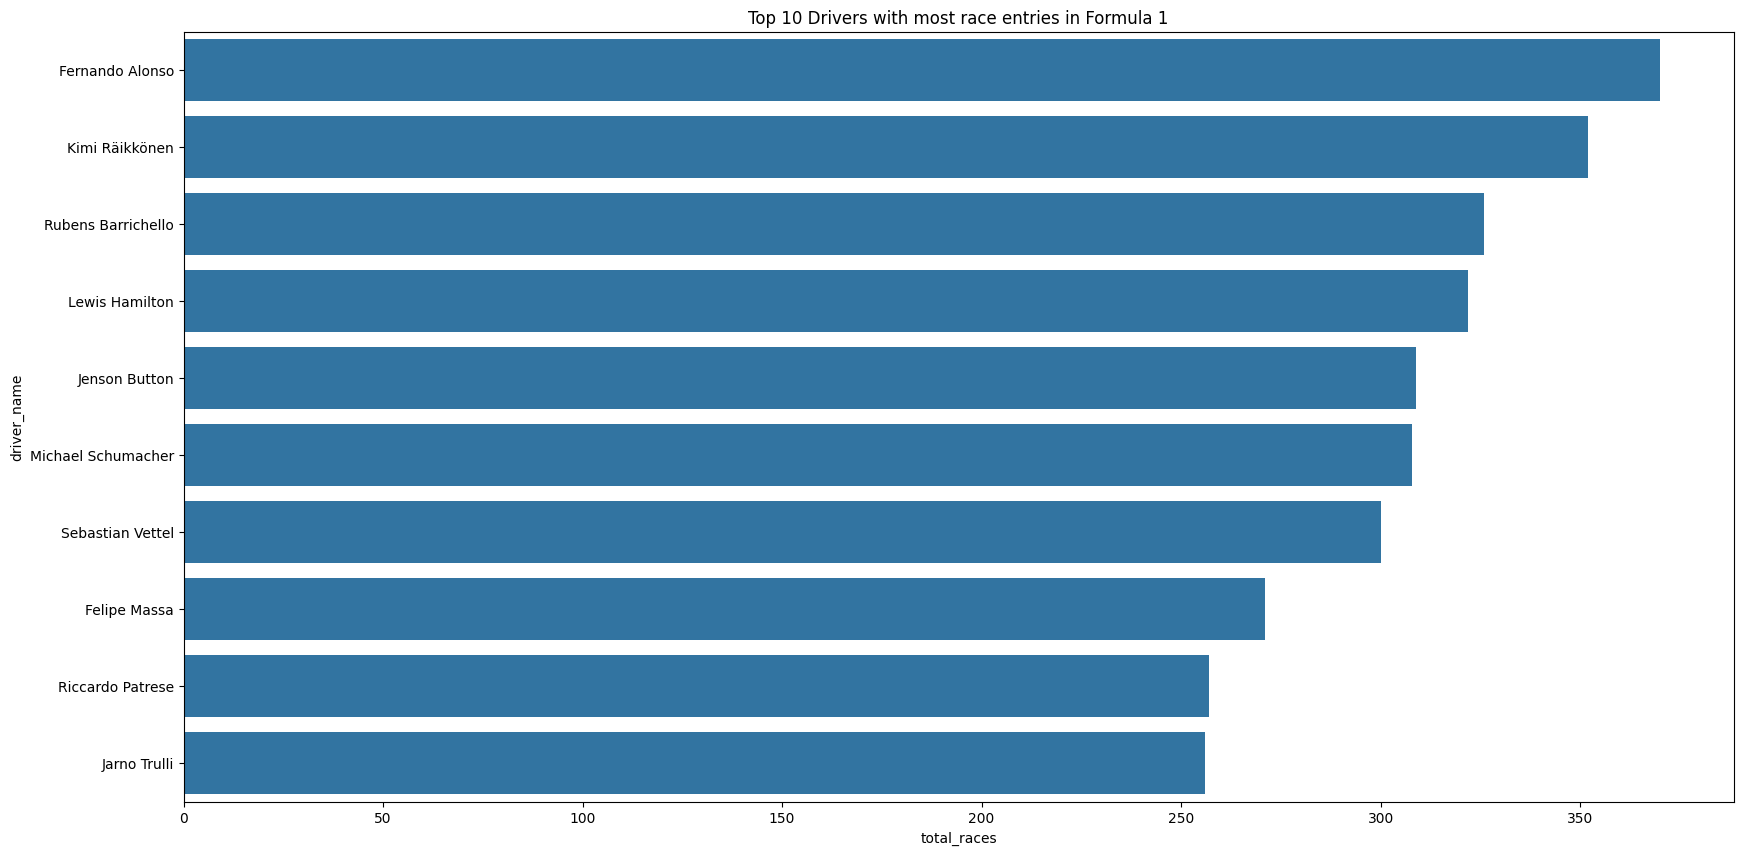

In [53]:
#En çok yarışan 10 F1 Pilotu
most_races = df.groupby('driver_name')[['raceId']].count().reset_index()
most_races = most_races.sort_values('raceId', ascending= False).head(10)
most_races = most_races.rename(columns ={'raceId': 'total_races'})
plt.figure(figsize = (20,10))
plt.title('Top 10 Drivers with most race entries in Formula 1')
sns.barplot(x = 'total_races' , y = 'driver_name' , data = most_races );

In [54]:
races.value_counts()
counts = races['name'].value_counts()
circuits_pop = pd.DataFrame({'circuitId': counts.index, 'number of times': counts.values})
circuits_pop

,circuitId,number of times
0,Italian Grand Prix,74
1,British Grand Prix,74
2,Monaco Grand Prix,69
3,Belgian Grand Prix,68
4,German Grand Prix,64
5,French Grand Prix,62
6,Spanish Grand Prix,53
7,Canadian Grand Prix,52
8,Brazilian Grand Prix,48
9,United States Grand Prix,44


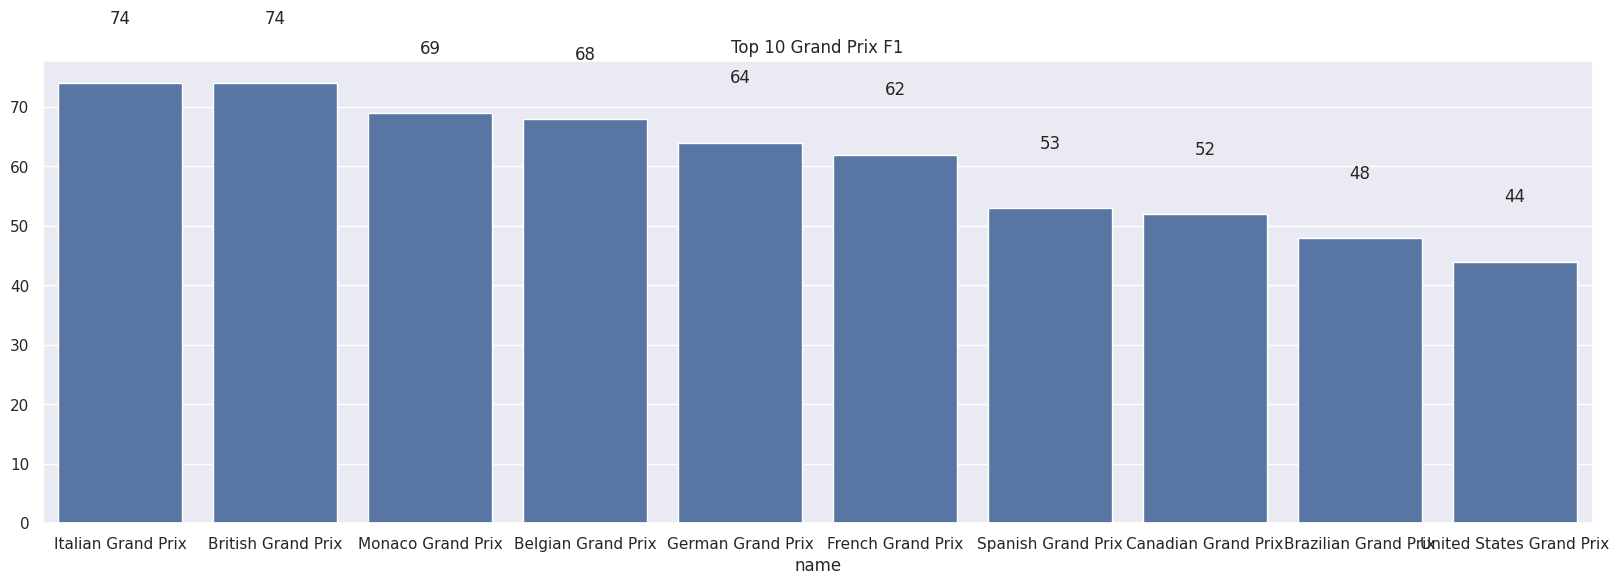

In [55]:
top_10_circuits=races['name'].value_counts()[:10]
sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top_10_circuits.index, y=top_10_circuits.values)
ax.set_title("Top 10 Grand Prix F1")


for i, v in enumerate(top_10_circuits):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)


plt.show()

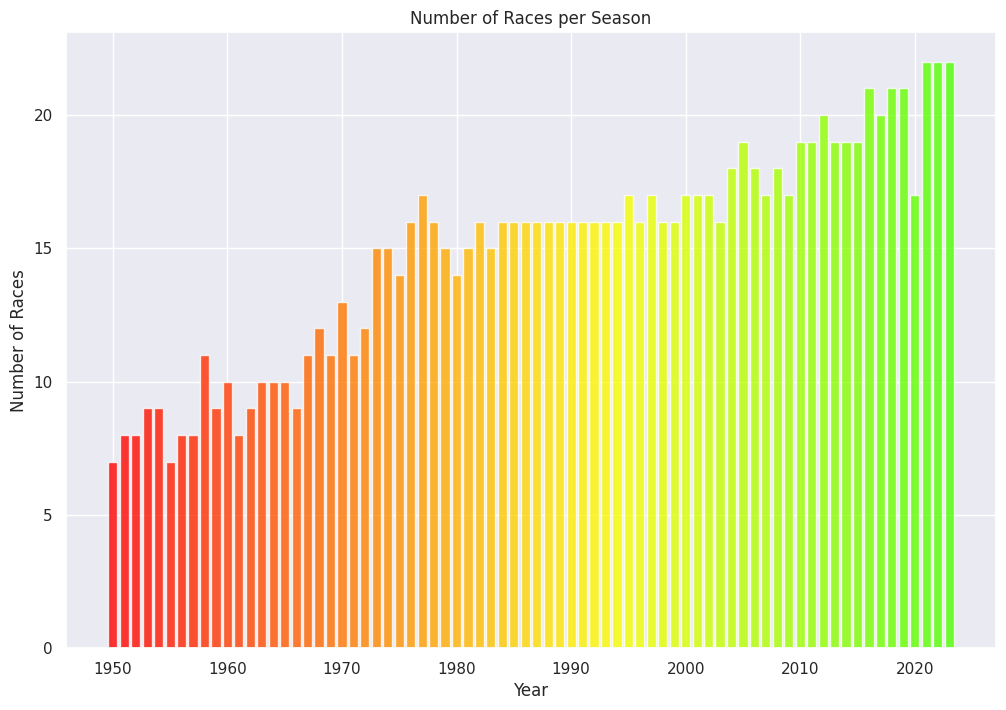

In [56]:
races_per_season = races.groupby('year')['raceId'].nunique()
plt.figure(figsize=(12, 8))
colors = plt.cm.hsv(range(len(races_per_season)))
plt.bar(races_per_season.index, races_per_season.values, color=colors, alpha=0.8)

plt.title('Number of Races per Season')
plt.xlabel('Year')
plt.ylabel('Number of Races')

plt.show()


In [57]:
import folium
coordinates=[]
for lat,lng in zip(circuits['lat'],circuits['lng']):
    coordinates.append([lat,lng])
maps = folium.Map(zoom_start=2,tiles='Stamen Watercolor')
for i,j in zip(coordinates,circuits.name):
    marker = folium.Marker(
        location=i,
        icon=folium.Icon(icon="car",color='cadetblue',prefix='fa'),
        popup="<strong>{0}</strong>".format(j))
    marker.add_to(maps)
maps

In [58]:
df_ts=df.copy()
df_ts=pd.DataFrame(df_ts)

In [59]:
df_ts.drop(columns=['time'], inplace=True)


In [60]:
df_ts.drop(columns=['fastestLapTime'],inplace=True)

In [61]:
df_ts.columns

Index(['raceId', 'grid', 'positionOrder', 'points', 'laps', 'milliseconds',
       'fastestLap', 'fastest_lap_rank', 'fastestLapSpeed', 'year', 'gp_name',
       'round', 'date', 'driver', 'driver_nationality', 'dob',
       'constructor_name', 'constructor_nationality', 'status', 'driver_name',
       'age'],
      dtype='object')

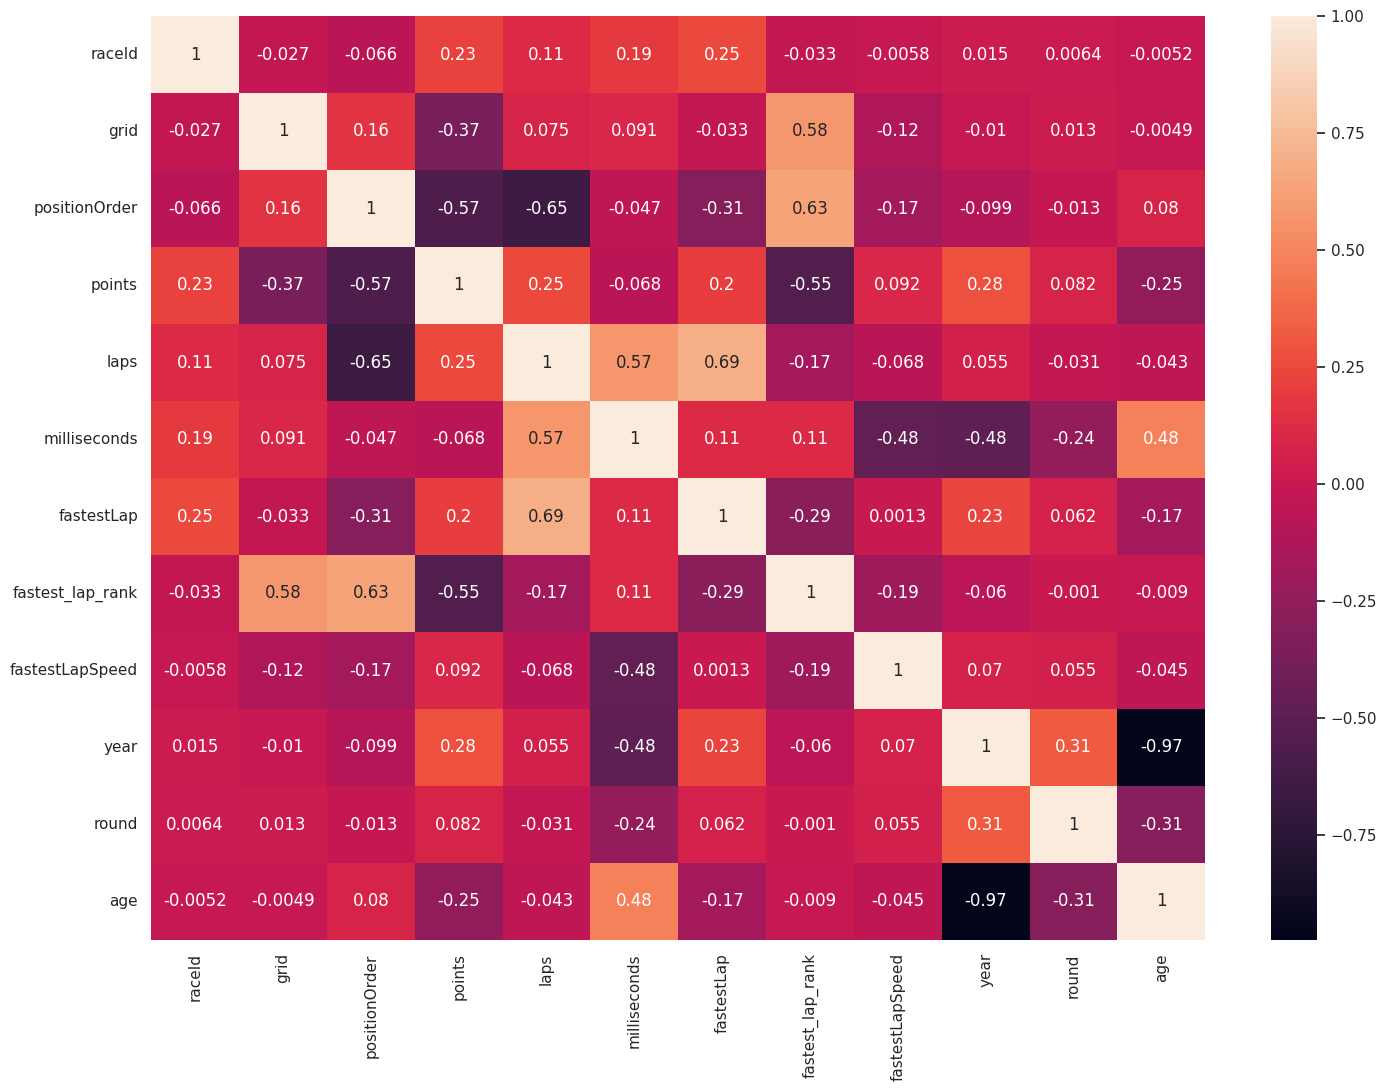

In [62]:
skewness = df_ts.drop(columns=['gp_name', 'constructor_nationality', 'status', 'driver_name', 'driver', 'driver_nationality', 'dob', 'constructor_name','date'])
plt.figure(figsize=(17, 12))
sns.heatmap(skewness.corr(), annot=True)
plt.show()



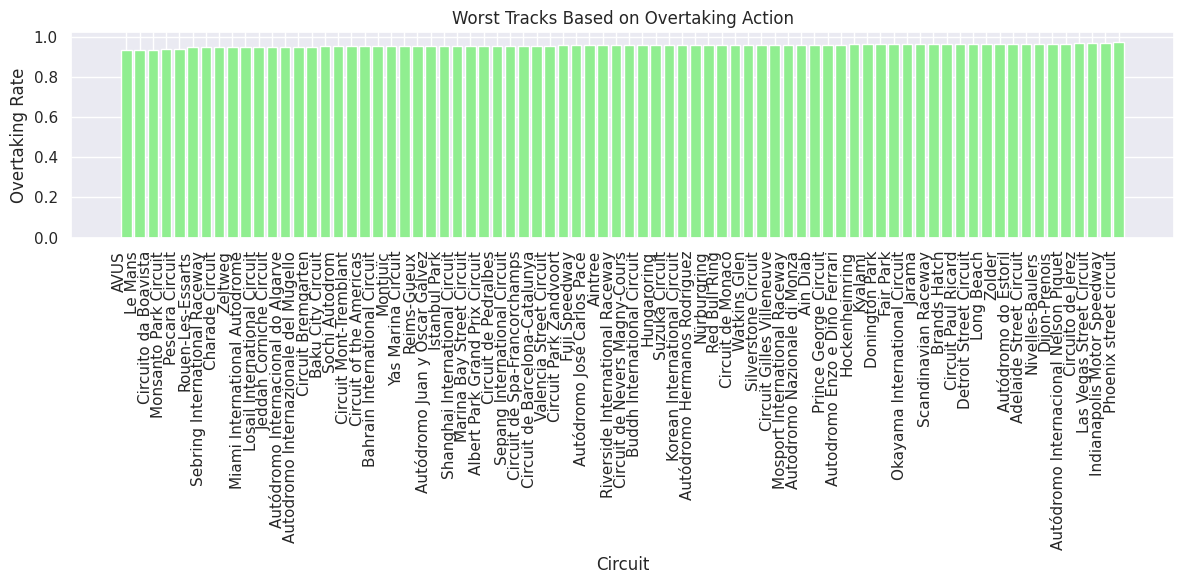

In [63]:
#Overtaking işlemine göre en kötü pistler
merged_data = pd.merge(races, results, on='raceId')
overtaking_rate = merged_data.groupby('circuitId')['positionOrder'].apply(lambda x: (x != 1).sum() / len(x)).reset_index()
overtaking_rate.columns = ['circuitId', 'overtake_rate']
overtaking_rate = pd.merge(overtaking_rate, circuits, on='circuitId')
worst_tracks = overtaking_rate.sort_values(by='overtake_rate', ascending=True)
plt.figure(figsize=(12, 6))
plt.bar(worst_tracks['name'], worst_tracks['overtake_rate'], color='lightgreen')
plt.xlabel('Circuit')
plt.ylabel('Overtaking Rate')
plt.title('Worst Tracks Based on Overtaking Action')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

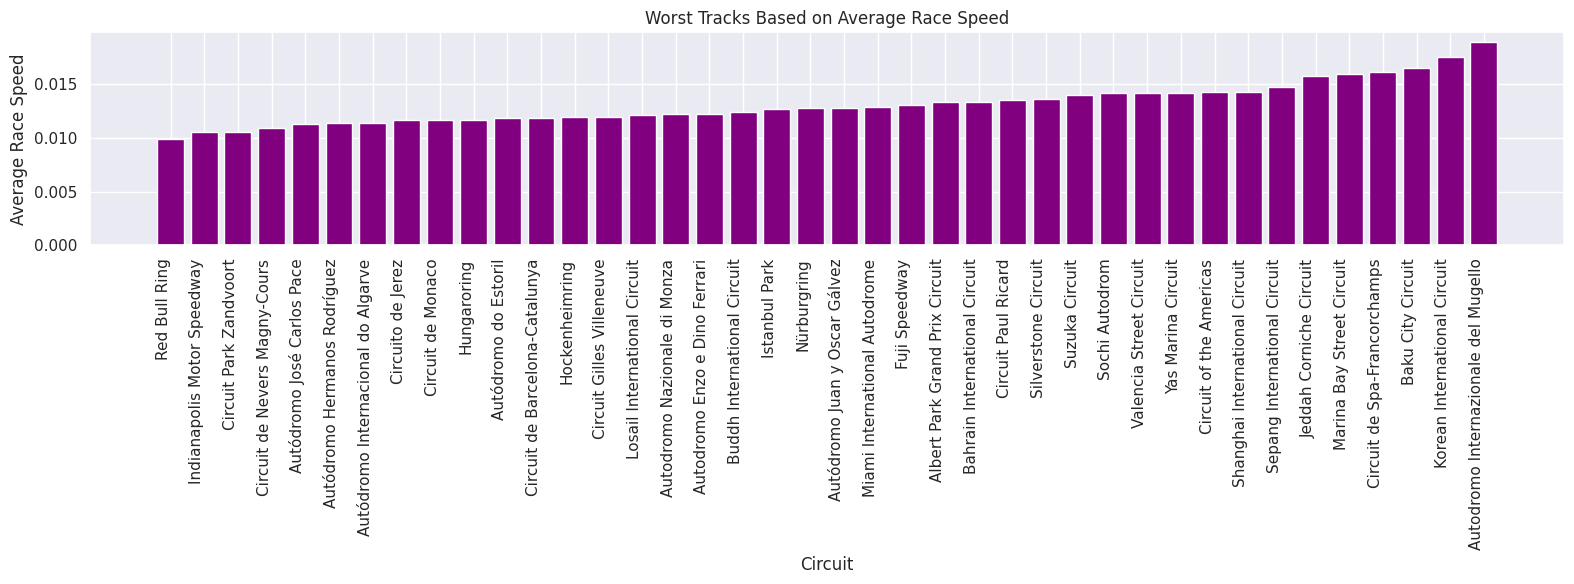

In [64]:
#Ortalama Yarış Hızına Göre En Kötü Pistler
merged_data = pd.merge(races, laptimes, on='raceId')
merged_data['average_speed'] = merged_data['milliseconds'] / merged_data['milliseconds'].max()
average_speed_by_track = merged_data.groupby('circuitId')['average_speed'].mean().reset_index()
average_speed_by_track = pd.merge(average_speed_by_track, circuits, left_on='circuitId', right_on='circuitId')
worst_tracks = average_speed_by_track.sort_values(by='average_speed')
plt.figure(figsize=(16, 6))
plt.bar(worst_tracks['name'], worst_tracks['average_speed'], color='purple')
plt.xlabel('Circuit')
plt.ylabel('Average Race Speed')
plt.title('Worst Tracks Based on Average Race Speed')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1600x600 with 0 Axes>

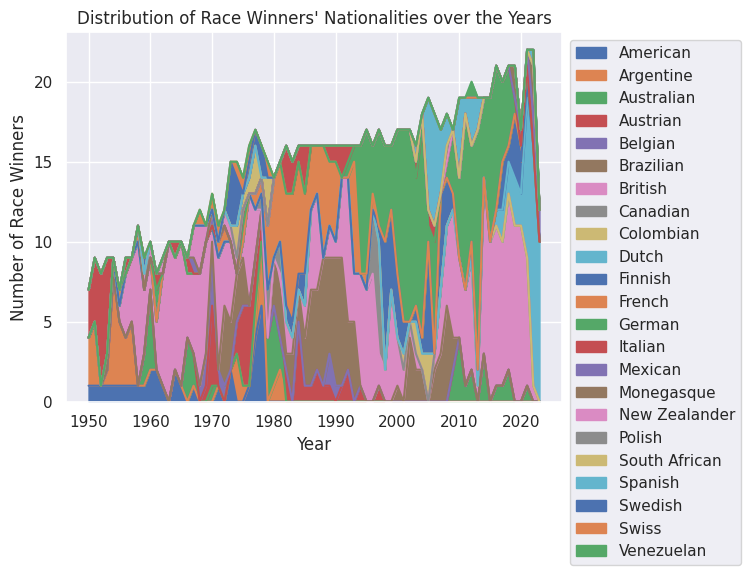

In [65]:
#Yarış Galiplerinin Milliyetlerinin Yıllara Göre Dağılımı
merged_data = pd.merge(races, results, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
race_winners = merged_data[merged_data['positionOrder'] == 1]
winner_nationalities = race_winners.groupby(['year', 'nationality'])['raceId'].count().reset_index()
pivot_data = winner_nationalities.pivot(index='year', columns='nationality', values='raceId')
pivot_data = pivot_data.fillna(0)
plt.figure(figsize=(16,6))
pivot_data.plot(kind='area', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Race Winners')
plt.title('Distribution of Race Winners\' Nationalities over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

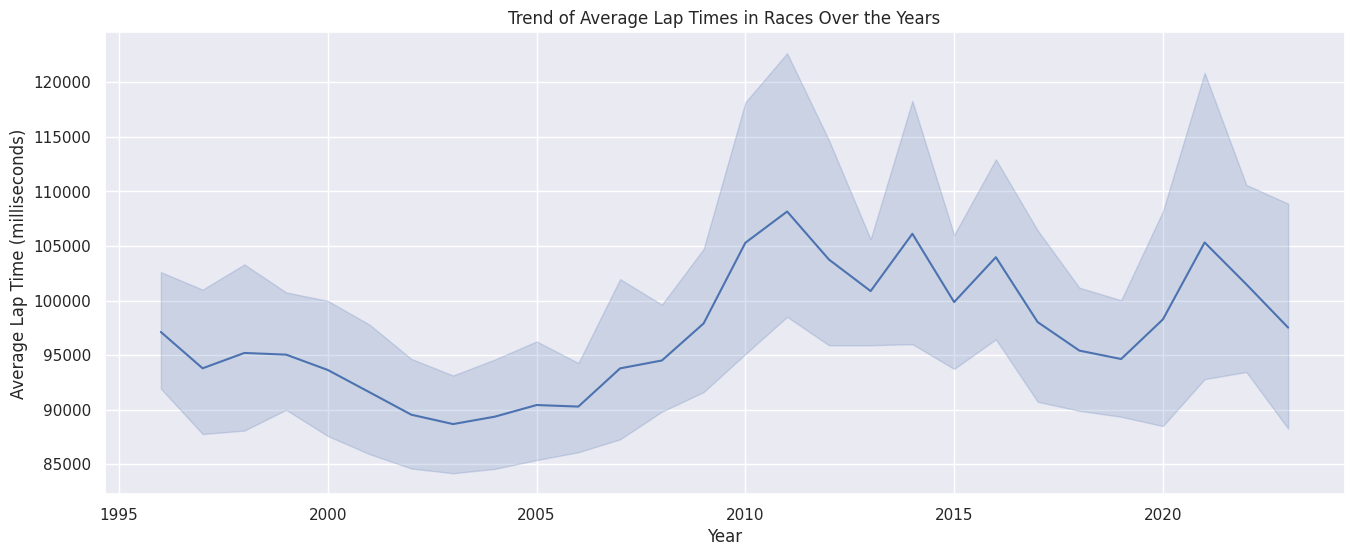

In [66]:
#Yarışlarda Ortalama Tur Sürelerinin Yıllara Göre Eğilimi
merged_data = pd.merge(races, laptimes, on='raceId')
merged_data = pd.merge(merged_data, drivers, on='driverId')
average_lap_time_by_race = merged_data.groupby(['year', 'raceId'])['milliseconds'].mean().reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(x='year', y='milliseconds', data=average_lap_time_by_race)
plt.xlabel('Year')
plt.ylabel('Average Lap Time (milliseconds)')
plt.title('Trend of Average Lap Times in Races Over the Years')
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [68]:
df.head()


,raceId,grid,positionOrder,points,laps,time,milliseconds,fastestLap,fastest_lap_rank,fastestLapTime,...,round,date,driver,driver_nationality,dob,constructor_name,constructor_nationality,status,driver_name,age
0,18,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,...,1,2008-03-16,hamilton,British,1985-01-07,McLaren,British,Finished,Lewis Hamilton,39.0
1,18,5,2,8.0,58,+5.478,5696094,41,3,1:27.739,...,1,2008-03-16,heidfeld,German,1977-05-10,BMW Sauber,German,Finished,Nick Heidfeld,47.0
2,18,7,3,6.0,58,+8.163,5698779,41,5,1:28.090,...,1,2008-03-16,rosberg,German,1985-06-27,Williams,British,Finished,Nico Rosberg,39.0
3,18,11,4,5.0,58,+17.181,5707797,58,7,1:28.603,...,1,2008-03-16,alonso,Spanish,1981-07-29,Renault,French,Finished,Fernando Alonso,43.0
4,18,3,5,4.0,58,+18.014,5708630,43,1,1:27.418,...,1,2008-03-16,kovalainen,Finnish,1981-10-19,McLaren,British,Finished,Heikki Kovalainen,43.0


In [69]:
df.columns

Index(['raceId', 'grid', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'fastest_lap_rank', 'fastestLapTime',
       'fastestLapSpeed', 'year', 'gp_name', 'round', 'date', 'driver',
       'driver_nationality', 'dob', 'constructor_name',
       'constructor_nationality', 'status', 'driver_name', 'age'],
      dtype='object')

In [70]:
df_2022 = df[df['year'] == 2022].copy()

# 'fastestLapTime' sütununu dakika cinsine dönüştürdüm
def convert_lap_time(time_str):
    if isinstance(time_str, str):
        minutes, seconds = map(float, time_str.split(":"))
        return minutes + seconds / 60.0
    else:
        return time_str

df_2022["fastestLapTime"] = df_2022["fastestLapTime"].apply(convert_lap_time)

# 'fastestLapTime' sütunundaki tüm değerleri float tipine dönüştürdüm
df_2022["fastestLapTime"] = pd.to_numeric(df_2022["fastestLapTime"])



In [71]:

# Tahmin için kullanılacak özellikler
X = df_2022[["raceId", "grid", "points", "laps", "fastestLap", "fastestLapTime"]]

# Sürücü adı
driver_names = df_2022["driver_name"]

# Yanıt etiketi
y = df_2022["positionOrder"]

# Yanıt etiketlerini kodladım
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Veri kümesini eğitim ve test kümelerine ayırdım
X_train, X_test, y_train, y_test, driver_names_train, driver_names_test = train_test_split(X, y, driver_names, test_size=0.3, random_state=17)

# Eksik veriler olduğundan dolayı bununla doldurup tahminlerde bulundum
imputer = SimpleImputer()

# Verilerdeki NaN değerlerini tahmin ettirdim
imputed_data = imputer.fit_transform(X_train)
imputed_test_data = imputer.transform(X_test)

# Karar ağacı sınıflandırıcı oluşturdum
classifier = DecisionTreeClassifier(max_depth=6)

# Karar ağacı sınıflandırıcıyı eğitilmiş verilerle eğittim
classifier.fit(imputed_data, y_train)

# Karar ağacı sınıflandırıcıyı test verileriyle test ettim
y_pred = classifier.predict(imputed_test_data)

# Tahmin sonuçlarını ve gerçek sonuçları içeren bir DataFrame oluşturdum
results_df = pd.DataFrame({"Tahmin Değeri:": encoder.inverse_transform(y_pred), "Gerçek Değeri:": encoder.inverse_transform(y_test)})

# Şampiyon adayını buldum
champion_candidates = results_df[results_df["Tahmin Değeri:"] == 1]["Gerçek Değeri:"]
if not champion_candidates.empty:
    champion_candidate_index = champion_candidates.index[0]  # İlk şampiyon adayının indeksini aldım
    champion_candidate = driver_names_test.iloc[champion_candidate_index]  # Sürücü adını indekse göre aldım
    print("Şampiyon Olabilecek Sürücü:", champion_candidate)
else:
    print("Şampiyon Olabilecek Sürücü Bulunamadı")
print(results_df)



Şampiyon Olabilecek Sürücü: Max Verstappen
     Tahmin Değeri:  Gerçek Değeri:
0                19              17
1                 1               1
2                 1               2
3                 6               6
4                10              10
..              ...             ...
127              11              19
128              19              14
129              18              11
130              19              16
131               5               5

[132 rows x 2 columns]
